<a href="https://colab.research.google.com/github/paolaportilloj/Visualizaci-n-de-datos-para-la-toma-de-decisiones/blob/main/clase12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path='/Canadaa.xlsx'

import pandas as pd

In [ ]:
df=pd.read_excel(path,
                 sheet_name='Canada by Citizenship',
                 skiprows=range(20),
                 skipfooter=2,
                 engine='openpyxl'
 )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
to_drop=['Type', 'Coverage',          'AREA',     'REG',
         'DEV', 'DevName']
df=df.drop(to_drop, axis=1)
df.head()


,OdName,AreaName,RegName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
df['Total']=df.iloc[:,3:].sum(axis=1)
df.head(2)

,OdName,AreaName,RegName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [ ]:
all(isinstance(column, str) for column in df.columns)

False

In [ ]:
df.columns=list(map(str,df.columns))

In [ ]:
all(isinstance(column, str) for column in df.columns)

True

In [ ]:
df.columns

Index(['OdName', 'AreaName', 'RegName', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', 'Total'],
      dtype='object')

In [ ]:
x=range(1980,2014)
years=list(map(str,x))

¿Cómo fue el comportamiento de la imigración desde Italia a Canada durnte 1980-2013?

In [ ]:
df.rename(columns={'OdName':'Country',
                   'AreaName': 'Continent',
                   'RegName': 'Region'},
          inplace=True)

In [ ]:
df.set_index('Country', inplace=True)
df.head(2)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
dfci= df.loc[['India', 'China'],years].transpose()

Text(0.5, 1.0, 'Immigration pattern from Italy to Canada')

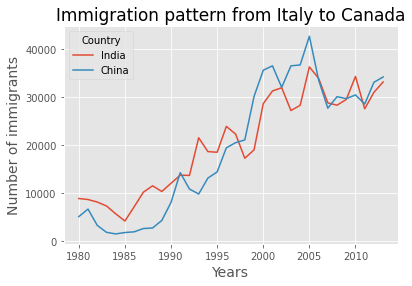

In [ ]:
dfci.plot(kind='line')
plt.xlabel('Years', fontsize= 14)
plt.ylabel('Number of immigrants', fontsize=14)
plt.title('Immigration pattern from Italy to Canada', fontsize=17)


In [ ]:
df.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
df_sorted=df.sort_values(['Total'], ascending=False)
df_sorted.Total

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
                                                         ...  
San Marino                                                   5
New Caledonia                                                5
Marshall Islands                                             2
Western Sahara                                               2
Palau                                                        1
Name: Total, Length: 195, dtype: int64

In [ ]:
df_sorted5=df_sorted.iloc[:5,3:36].transpose()
df_sorted5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261
1990,12041,8076,31668,12509,2470


<AxesSubplot:>

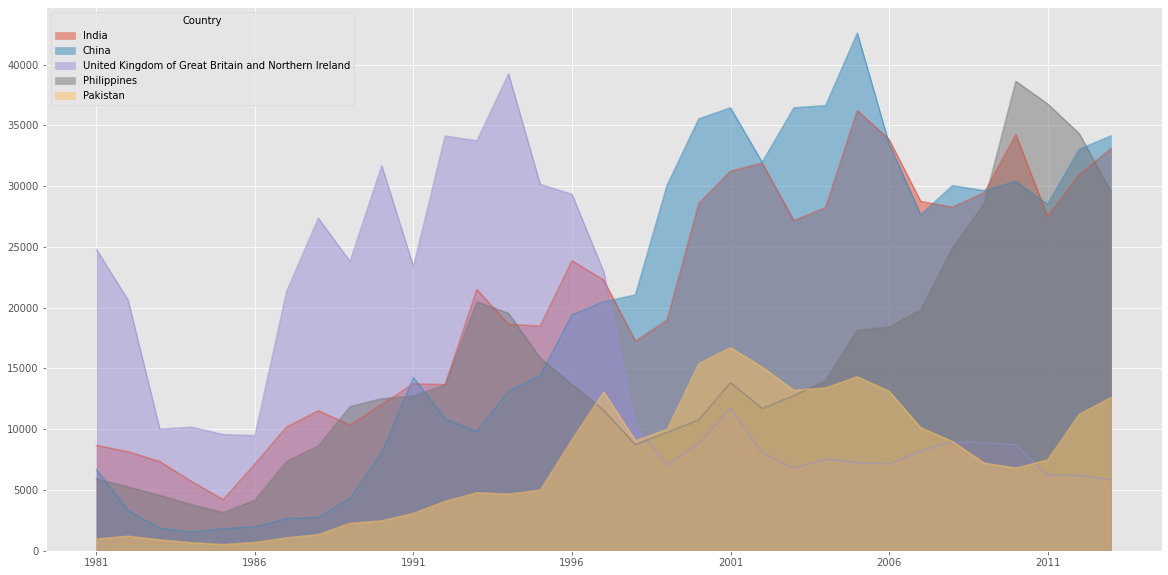

In [ ]:
df_sorted5.plot(kind='area', 
                figsize=(20,10),
                stacked= False,
                alpha=0.5
    )

In [ ]:
ndf= df.iloc[:10,:10]

In [ ]:
ndf

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987
Country,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0
Angola,Africa,Middle Africa,1,3,6,6,4,3,5,5
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,0,0,0,0,42,52,51,61
Argentina,Latin America and the Caribbean,South America,368,426,626,241,237,196,213,519
Armenia,Asia,Western Asia,0,0,0,0,0,0,0,0


In [ ]:
cors=ndf.corr()

In [ ]:
import seaborn as sns


<AxesSubplot:>

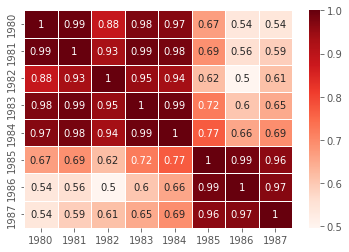

In [ ]:
sns.heatmap(ndf.corr(),
            annot=True,
            linewidth=0.5,
            cmap='Reds'
            )

In [ ]:
*